# RTL Wiki. Building Topic Model

An example of a two-staged TopicNet's experiment (with some models' properties exploration).

* Related notebook (with experiment for another dataset): [PScience-Building-Topic-Model.ipynb](./PScience-Building-Topic-Model.ipynb)

# Contents<a id="contents"></a>

* [Data](#data)
* [Inital ARTM Model](#artm-model)
* [Root TopicModel and Experiment](#topic-model)
* [Looking at trained models](#trained-models)
* [Exploring a model using viewers](#some-model)
* [Improving document-topic distribution](#improving-distribution)
* [Exploring a model after experiment improvement](#some-model2)

In [ ]:
import numpy as np

from IPython.display import display, display_html

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import cm

In [ ]:
import artm

from topicnet.cooking_machine import Dataset
from topicnet.cooking_machine.cubes import (
    CubeCreator,
    GreedyStrategy,
    PerplexityStrategy,
    RegularizersModifierCube,
)
from topicnet.cooking_machine.experiment import Experiment
from topicnet.cooking_machine.model_constructor import init_simple_default_model
from topicnet.cooking_machine.models.topic_model import TopicModel
from topicnet.cooking_machine.pretty_output import make_notebook_pretty
from topicnet.viewers.top_documents_viewer import TopDocumentsViewer
from topicnet.viewers.top_tokens_viewer import TopTokensViewer

In [ ]:
make_notebook_pretty()

## Data<a id="data"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

Loading, filtering

In [1]:
demo_data = Dataset('wiki_data.csv', internals_folder_path="./wiki_batches")

In [2]:
demo_data._cached_dict = demo_data.get_dictionary().filter(
    min_df=5.0, min_tf=5.0, max_df_rate=0.9
)

In [3]:
demo_data.get_dataset().head()

Unnamed: 0  \
id                             
İsmet_İnönü                0   
Clara_Petacci              1   
Jack_Ruby                  2   
Knud_Rasmussen             3   
Gerald_Schroeder           4   

                                                           raw_text  \
id                                                                    
İsmet_İnönü       Mustafa İsmet İnönü (September 24 1884 – Decem...   
Clara_Petacci     Clara Petacci (Claretta Petacci) (28 February ...   
Jack_Ruby         Jacob Rubenstein (March 25, 1911 – January 3, ...   
Knud_Rasmussen    Knud Johan Victor Rasmussen (June 7, 1879–Dece...   
Gerald_Schroeder  Gerald L. Schroeder is a scientist, author, an...   

                                                            vw_text  
id                                                                   
İsmet_İnönü       İsmet_İnönü |@lemmatized mustafa:2 smet:7 nönü...  
Clara_Petacci     Clara_Petacci |@lemmatized clara:5 petacci:15 ...  
Jack_Ruby         Jack_Ruby |@lemmatized jacob:2 rubenstein:5 ma...  
Knud_Rasmussen    Knud_Rasmussen |@lemmatized knud:15 johan:3 vi...  
Gerald_Schroeder  Gerald_Schroeder |@lemmatized gerald:4 l:1 sch...

## Inital ARTM Model<a id="artm-model"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

In [4]:
model_artm = init_simple_default_model(
    dataset=demo_data,
    modalities_to_use={'@lemmatized': 1.0, '@bigram': 1.0},
    main_modality='@lemmatized',
    specific_topics=15,
    background_topics=1,
)

model_artm.scores

[PerplexityScore@all, SparsityThetaScore, SparsityPhiScore@lemmatized, PerplexityScore@lemmatized, TopicKernel@lemmatized, SparsityPhiScore@bigram, PerplexityScore@bigram, TopicKernel@bigram]

## Root TopicModel and Experiment<a id="topic-model"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

Creating topic model around ARTM model:

In [6]:
tm = TopicModel(model_artm)

In [7]:
specific_topics = [t for t in tm.topic_names if "background" not in t]

In [8]:
model_artm.regularizers

[smooth_phi_bcg, smooth_theta_bcg]

In [9]:
model_artm.scores

[PerplexityScore@all, SparsityThetaScore, SparsityPhiScore@lemmatized, PerplexityScore@lemmatized, TopicKernel@lemmatized, SparsityPhiScore@bigram, PerplexityScore@bigram, TopicKernel@bigram]

In [10]:
experiment = Experiment(
    experiment_id="wiki_experiment",
    save_path="rtl_wiki/experiments",
    topic_model=tm
)

In [13]:
my_first_cube = RegularizersModifierCube(
    num_iter=10,
    regularizer_parameters=[
        {
            'regularizer': artm.DecorrelatorPhiRegularizer(
                name='decorrelation_phi', 
                class_ids="@lemmatized", 
                topic_names=specific_topics
            ),
            'tau_grid': [0, 0.005, 0.01, 0.015, 0.02, 0.025]
        },
        {
            'regularizer': artm.SmoothSparsePhiRegularizer(
                name="smsp_phi_specific",
                class_ids="@lemmatized", 
                topic_names=specific_topics
            ),
            'tau_grid': [-0.05, 0, 0.05]
        },
        {
            'name': "smooth_phi_bcg",
            'tau_grid': [0.1]
        },
    ],
    verbose=True
)

my_first_cube(tm, demo_data)

100%|██████████| 18/18 [06:53<00:00, 22.95s/it]


In [15]:
experiment.show()

Experiment wiki_experiment

Experiment was made with BigARTM 0.9.0
Tree:
                              ┌##17h46m43s_24d10m2019y###
                              ├##17h47m05s_24d10m2019y###
                              ├##17h47m28s_24d10m2019y###
                              ├##17h47m51s_24d10m2019y###
                              ├##17h48m14s_24d10m2019y###
                              ├##17h48m37s_24d10m2019y###
                              ├##17h48m59s_24d10m2019y###
                              ├##17h49m23s_24d10m2019y###
                              ├##17h49m46s_24d10m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##17h50m09s_24d10m2019y###
                              ├##17h50m32s_24d10m2019y###
                              ├##17h50m55s_24d10m2019y###
                              ├##17h51m18s_24d10m2019y###
                              ├##17h51m41s_24d10m2019y###
                              ├##17h52m04s_24d10m2019y###
                         

## Looking at trained models<a id="trained-models"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

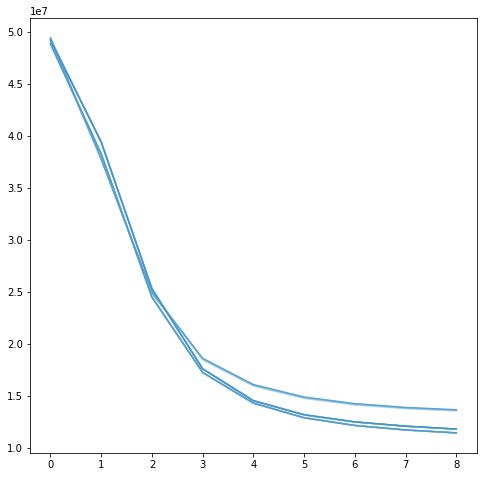

In [16]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))

for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['PerplexityScore@all']
    plt.plot(score[1:], color=cm.Blues(colors[i]))

plt.show()

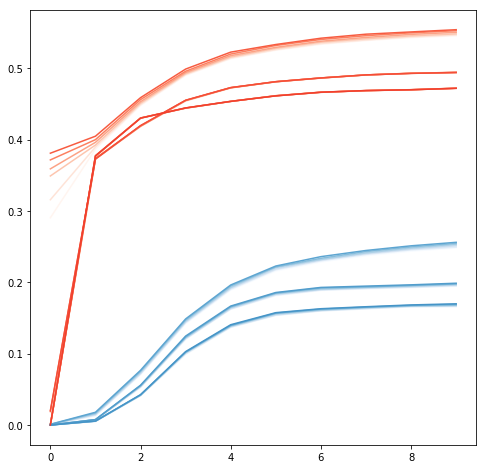

In [17]:
tms = experiment.models
colors = np.linspace(0, 0.65, len(tms))

plt.figure(figsize=(8,8))

for i, tm in enumerate(list(tms.values())[1:]):
    score = tm.scores['TopicKernel@lemmatized.average_purity']
    plt.plot(score, color=cm.Blues(colors[i]))

    score = tm.scores['TopicKernel@lemmatized.average_contrast']
    plt.plot(score, color=cm.Reds(colors[i]))

plt.show()

In [18]:
query = (
    "TopicKernel@lemmatized.average_contrast > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_contrast) "
    "and TopicKernel@lemmatized.average_purity > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_purity) "
    "and PerplexityScore@all < 1.1 * MINIMUM(PerplexityScore@all) "
)
models = experiment.select(query)

models = experiment.select(query + " COLLECT all")

print(len(models))

6


In [19]:
def describe_model(model):
    for reg_name, reg in model.regularizers._data.items():
        print(reg_name, reg.tau)

    print(model.scores["PerplexityScore@all"][-1])
    print(model.scores["TopicKernel@lemmatized.average_contrast"][-1])
    print(model.scores["TopicKernel@lemmatized.average_purity"][-1])
    print("------")

In [20]:
for model in models:
    describe_model(model)

smooth_phi_bcg 0.1
smooth_theta_bcg 0.0
decorrelation_phi 0
smsp_phi_specific 0.0
11431396.0
0.49426960945129395
0.19459345936775208
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.0
decorrelation_phi 0.005
smsp_phi_specific 0.0
11433357.0
0.49436870217323303
0.195402130484581
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.0
decorrelation_phi 0.01
smsp_phi_specific 0.0
11436253.0
0.49431541562080383
0.1962587833404541
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.0
decorrelation_phi 0.015
smsp_phi_specific 0.0
11440095.0
0.4943116009235382
0.19706884026527405
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.0
decorrelation_phi 0.02
smsp_phi_specific 0.0
11444871.0
0.4941447973251343
0.19780972599983215
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.0
decorrelation_phi 0.025
smsp_phi_specific 0.0
11450295.0
0.49418962001800537
0.19877628982067108
------


The models are really close. However, last 2 look better. Let's take a closer look at one of them.

In [21]:
query = (
    "TopicKernel@lemmatized.average_contrast > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_contrast) "
    "and TopicKernel@lemmatized.average_purity > 0.7 * MAXIMUM(TopicKernel@lemmatized.average_purity) "
    "and PerplexityScore@all < 1.1 * MINIMUM(PerplexityScore@all) "
    "and TopicKernel@lemmatized.average_purity -> max"    
)

models = experiment.select(query + " COLLECT 2")

print(len(models))

2


In [22]:
last_model = models[-1]

This is optional, but encouraged: let's log our selection criteria, so Experiment "knows" how exactly models were chosen.


In [25]:
experiment.set_criteria(cube_index=1, criteria=query + " COLLECT 2")
experiment.show()

Experiment wiki_experiment

Experiment was made with BigARTM 0.9.0
Tree:
                              ┌##17h46m43s_24d10m2019y###
                              ├##17h47m05s_24d10m2019y###
                              ├##17h47m28s_24d10m2019y###
                              ├##17h47m51s_24d10m2019y###
                              ├##17h48m14s_24d10m2019y###
                              ├##17h48m37s_24d10m2019y###
                              ├##17h48m59s_24d10m2019y###
                              ├##17h49m23s_24d10m2019y###
                              ├##17h49m46s_24d10m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##17h50m09s_24d10m2019y###
                              ├##17h50m32s_24d10m2019y###
                              ├##17h50m55s_24d10m2019y###
                              ├##17h51m18s_24d10m2019y###
                              ├##17h51m41s_24d10m2019y###
                              ├##17h52m04s_24d10m2019y###
                         

Looks better this way, doesn't it?

## Exploring a model using viewers<a id="some-model"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

In [27]:
last_model_top_tok = TopTokensViewer(last_model, num_top_tokens=10, method='phi')
last_model_html = last_model_top_tok.to_html()

In [28]:
last_model_top_doc = TopDocumentsViewer(last_model, dataset=demo_data).view()

In [30]:
n=7

for topic_name, topic_docs in list(zip(last_model.topic_names, last_model_top_doc))[:n]:
    last_model_html = last_model_top_tok.to_html(topic_names=[topic_name])
    display_html(last_model_html, raw=True)
    display(topic_docs)

topic_0 @bigram 
 
 
 united_state 
 0.01469 
 
 bin_laden 
 0.01366 
 
 new_york 
 0.00923 
 
 http_www 
 0.00811 
 
 al_qaeda 
 0.00802 
 
 south_africa 
 0.00776 
 
 york_time 
 0.00767 
 
 prime_minister 
 0.00552 
 
 ahmad_shah 
 0.00497 
 
 west_indie 
 0.00451 
 
 
 
 
 
 topic_0 @lemmatized 
 
 
 state 
 0.00636 
 
 time 
 0.00501 
 
 al 
 0.00469 
 
 one 
 0.00409 
 
 new 
 0.0039 
 
 u 
 0.00383 
 
 say 
 0.00373 
 
 test 
 0.00363 
 
 party 
 0.00356 
 
 government 
 0.00352

['Osama_bin_Laden',
 'Brian_Lara',
 'Abu_Zubaydah',
 'Hansie_Cronje',
 'Nawaf_al-Hazmi',
 'Bal_Thackeray',
 'Ian_Botham',
 'Kenneth_Kaunda',
 'Daniel_Ortega',
 'Ariel_Sharon']

topic_1 @bigram 
 
 
 new_york 
 0.01782 
 
 st_john 
 0.01128 
 
 john_baptist 
 0.00977 
 
 anglo_saxon 
 0.00743 
 
 mary_magdalene 
 0.00704 
 
 st_martin 
 0.00612 
 
 st_louis 
 0.00471 
 
 john_chrysostom 
 0.0045 
 
 external_link 
 0.00419 
 
 new_testament 
 0.00418 
 
 
 
 
 
 topic_1 @lemmatized 
 
 
 john 
 0.00895 
 
 church 
 0.00708 
 
 st 
 0.00678 
 
 god 
 0.00485 
 
 new 
 0.00458 
 
 saint 
 0.00442 
 
 jordan 
 0.00434 
 
 one 
 0.00433 
 
 jesus 
 0.00424 
 
 p 
 0.00415

['John_the_Baptist',
 'Elijah',
 'Ã%86lfheah_of_Canterbury',
 'Matthew_the_Apostle',
 'Mary_Magdalene',
 'John_the_Evangelist',
 'Augustine_of_Canterbury',
 'Michael_Jordan',
 'Moses',
 'Barnabas']

topic_2 @bigram 
 
 
 henry_viii 
 0.01146 
 
 new_york 
 0.00559 
 
 henry_vii 
 0.00363 
 
 royal_navy 
 0.00336 
 
 united_state 
 0.00331 
 
 major_league 
 0.00317 
 
 third_reich 
 0.00306 
 
 prince_wale 
 0.00287 
 
 edward_vi 
 0.0028 
 
 king_henry 
 0.00264 
 
 
 
 
 
 topic_2 @lemmatized 
 
 
 henry 
 0.00926 
 
 p 
 0.00578 
 
 elizabeth 
 0.00546 
 
 mary 
 0.00456 
 
 england 
 0.00453 
 
 first 
 0.00452 
 
 ship 
 0.00429 
 
 nelson 
 0.00409 
 
 battle 
 0.00362 
 
 king 
 0.00347

['Charles_Robert_Malden',
 'Horatio_Nelson,_1st_Viscount_Nelson',
 'Mary_I_of_England',
 'Henry_VIII_of_England',
 'Francis_Drake',
 'Catherine_of_Aragon',
 'Arthur_Phillip',
 'John_Paul_Jones',
 'Elihu_Yale',
 'Henry_the_Navigator']

topic_3 @bigram 
 
 
 science_fiction 
 0.02782 
 
 short_story 
 0.0259 
 
 new_york 
 0.00953 
 
 grand_slam 
 0.0067 
 
 french_open 
 0.00561 
 
 u_open 
 0.00518 
 
 james_joyce 
 0.00482 
 
 external_link 
 0.00454 
 
 henry_ford 
 0.00452 
 
 australian_open 
 0.00445 
 
 
 
 
 
 topic_3 @lemmatized 
 
 
 story 
 0.01453 
 
 novel 
 0.01194 
 
 fiction 
 0.00854 
 
 book 
 0.00796 
 
 write 
 0.00679 
 
 world 
 0.00608 
 
 work 
 0.00608 
 
 publish 
 0.00599 
 
 year 
 0.00581 
 
 short 
 0.00569

['Björn_Borg',
 'James_Tiptree,_Jr',
 'Martina_Hingis',
 'Clark_Ashton_Smith',
 'James_Blaylock',
 'Fritz_Leiber',
 'A',
 'Patrick_Rafter',
 'Andre_Agassi',
 'Anna_Kournikova']

topic_4 @bigram 
 
 
 louis_xiv 
 0.00774 
 
 roman_empire 
 0.00523 
 
 imperial_prince 
 0.00429 
 
 roman_emperor 
 0.0039 
 
 holy_roman 
 0.0038 
 
 imperial_princess 
 0.00377 
 
 new_york 
 0.00374 
 
 without_issue 
 0.00362 
 
 ottoman_empire 
 0.00349 
 
 emperor_japan 
 0.0032 
 
 
 
 
 
 topic_4 @lemmatized 
 
 
 emperor 
 0.01264 
 
 king 
 0.01028 
 
 son 
 0.00767 
 
 prince 
 0.00697 
 
 ii 
 0.0063 
 
 daughter 
 0.00546 
 
 imperial 
 0.00521 
 
 empire 
 0.00519 
 
 p 
 0.00517 
 
 year 
 0.00502

['Emperor_Montoku',
 'Emperor_Seiwa',
 'Emperor_Junna',
 'Emperor_Bidatsu',
 'Emperor_Sushun',
 'Emperor_Monmu',
 'Emperor_Kazan',
 'Emperor_Uda',
 'Emperor_Kanmu',
 "Emperor_Go-En'yū"]

topic_5 @bigram 
 
 
 new_york 
 0.0154 
 
 r_b 
 0.00675 
 
 external_link 
 0.0063 
 
 retrieve_january 
 0.00564 
 
 united_state 
 0.00435 
 
 u_r 
 0.00407 
 
 string_quartet 
 0.00397 
 
 york_city 
 0.00395 
 
 retrieve_march 
 0.00394 
 
 flat_major 
 0.00374 
 
 
 
 
 
 topic_5 @lemmatized 
 
 
 work 
 0.01073 
 
 music 
 0.00742 
 
 art 
 0.00666 
 
 brown 
 0.00561 
 
 first 
 0.00517 
 
 year 
 0.00427 
 
 major 
 0.00416 
 
 op 
 0.00408 
 
 new 
 0.00404 
 
 piano 
 0.00397

['Carl_Friedrich_Abel',
 'Georg_Philipp_Telemann',
 'Alberto_Giacometti',
 'Karl_Benz',
 'Franz_Schmidt',
 'Edvard_Grieg',
 'Dale_Chihuly',
 'Mario_Botta',
 'Anton_Diabelli',
 'Frédéric_Chopin']

topic_6 @bigram 
 
 
 new_york 
 0.01994 
 
 university_press 
 0.01056 
 
 nobel_prize 
 0.00879 
 
 united_state 
 0.00716 
 
 external_link 
 0.00611 
 
 press_isbn 
 0.0055 
 
 see_also 
 0.00493 
 
 university_chicago 
 0.00385 
 
 academy_science 
 0.00376 
 
 columbia_university 
 0.00358 
 
 
 
 
 
 topic_6 @lemmatized 
 
 
 university 
 0.00918 
 
 work 
 0.00707 
 
 science 
 0.00699 
 
 theory 
 0.00662 
 
 new 
 0.00513 
 
 isbn 
 0.00434 
 
 book 
 0.00409 
 
 study 
 0.00408 
 
 research 
 0.00398 
 
 philosophy 
 0.00364

['Grigory_Barenblatt',
 'Brian_Kernighan',
 'James_Heckman',
 'Karl_Ferdinand_Braun',
 'Dennis_Ritchie',
 'Ernst_Mayr',
 'Heinrich_Hertz',
 'John_Bardeen',
 'Karl_Popper',
 'Charles_F']

The topics aren't ideal, but adequate.

We see topics related to kings (and Muslim rulers), religious figures (and sportsmen: `'jordan'` refers both to Jordan River and Michael Jordan), emperors, writers, composers, mathematicians/philosophers/scientists. 

In [31]:
last_model_html = last_model_top_tok.to_html(topic_names=['background_15'])
display_html(last_model_html, raw=True)
    
topic_docs = last_model_top_doc[-1]
topic_docs = [str(topic) for topic in topic_docs]

for doc_id in topic_docs:
    print(doc_id)

background_15 @bigram 
 
 
 prime_minister 
 0.02166 
 
 world_war 
 0.01223 
 
 von_neumann 
 0.00784 
 
 united_kingdom 
 0.00642 
 
 foreign_policy 
 0.00514 
 
 labour_party 
 0.00463 
 
 war_ii 
 0.00438 
 
 general_election 
 0.0038 
 
 nova_scotia 
 0.00376 
 
 conservative_party 
 0.00371 
 
 
 
 
 
 background_15 @lemmatized 
 
 
 war 
 0.00789 
 
 minister 
 0.00691 
 
 government 
 0.00593 
 
 become 
 0.00513 
 
 british 
 0.00501 
 
 party 
 0.00493 
 
 german 
 0.00482 
 
 first 
 0.00478 
 
 year 
 0.00464 
 
 would 
 0.00426

Mackenzie_Bowell
Charles_Tupper
Louis_St
Neville_Chamberlain
Clement_Attlee
Alexander_Mackenzie
Benjamin_Disraeli
Kurt_Georg_Kiesinger
Henry_Bruce,_1st_Baron_Aberdare
Michael_Foot


## Improving document-topic distribution<a id="improving-distribution"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

In [ ]:
theta_cube = RegularizersModifierCube(
    num_iter=10,
    regularizer_parameters=[
        {
            'regularizer': artm.SmoothSparseThetaRegularizer(
                name="smsp_theta_specific",
                topic_names=specific_topics
            ),
            'tau_grid': [-0.05, -0.01]
        },
        {
            'name': "smooth_theta_bcg",
            'tau_grid': [0.01, 0.1]
        },
    ],
    verbose=True
)

theta_cube(models, demo_data)

In [34]:
experiment.show()

Experiment wiki_experiment

Experiment was made with BigARTM 0.9.0
Tree:
                              ┌##17h46m43s_24d10m2019y###
                              ├##17h47m05s_24d10m2019y###
                              ├##17h47m28s_24d10m2019y###
                              ├##17h47m51s_24d10m2019y###
                              ├##17h48m14s_24d10m2019y###
                              ├##17h48m37s_24d10m2019y###
                              ├##17h48m59s_24d10m2019y###
                              ├##17h49m23s_24d10m2019y###
                              ├##17h49m46s_24d10m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##17h50m09s_24d10m2019y###
                              ├##17h50m32s_24d10m2019y###
                              ├##17h50m55s_24d10m2019y###
                              ├##17h51m18s_24d10m2019y###
                              │                                                                                                      ┌##18h13

In [36]:
query = (
    "TopicKernel@lemmatized.average_contrast > 0.95 * MAXIMUM(TopicKernel@lemmatized.average_contrast) "
    "and TopicKernel@lemmatized.average_purity > 0.95 * MAXIMUM(TopicKernel@lemmatized.average_purity) "
    "and PerplexityScore@all < 1.1 * MINIMUM(PerplexityScore@all) "
    "and SparsityThetaScore > MEDIAN(SparsityThetaScore)"
)
models = experiment.select(query)

print(len(models))

4


In [37]:
for model in models:
    describe_model(model)

smooth_phi_bcg 0.1
smooth_theta_bcg 0.01
decorrelation_phi 0.025
smsp_phi_specific 0.0
smsp_theta_specific -9.111882954680624
10380279.0
0.49794384837150574
0.19310863316059113
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.1
decorrelation_phi 0.025
smsp_phi_specific 0.0
smsp_theta_specific -9.111882954680624
10380976.0
0.4979652762413025
0.1931198388338089
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.01
decorrelation_phi 0.02
smsp_phi_specific 0.0
smsp_theta_specific -9.111882954680624
10373520.0
0.49823978543281555
0.19223743677139282
------
smooth_phi_bcg 0.1
smooth_theta_bcg 0.1
decorrelation_phi 0.02
smsp_phi_specific 0.0
smsp_theta_specific -9.111882954680624
10374009.0
0.4982163906097412
0.1922537386417389
------


In [38]:
best_model = models[0]

## Exploring a model after experiment improvement<a id="some-model2"></a>

<div style="text-align: right">Back to <a href=#contents>Contents</a></div>

In [39]:
first_model_top_tok = TopTokensViewer(best_model, num_top_tokens=10, method='phi')
first_model_html =  first_model_top_tok.to_html()
first_model_top_doc = TopDocumentsViewer(best_model, dataset=demo_data).view()

In [40]:
n=7

for topic_name, topic_docs in list(zip(best_model.topic_names, first_model_top_doc))[:n]:
    best_model_html = first_model_top_tok.to_html(topic_names=[topic_name])
    display_html(best_model_html, raw=True)
    display(topic_docs)

topic_0 @bigram 
 
 
 united_state 
 0.01555 
 
 bin_laden 
 0.0137 
 
 new_york 
 0.01089 
 
 al_qaeda 
 0.00805 
 
 york_time 
 0.00774 
 
 south_africa 
 0.00735 
 
 http_www 
 0.00601 
 
 sri_lanka 
 0.00516 
 
 ahmad_shah 
 0.00499 
 
 west_indie 
 0.00445 
 
 
 
 
 
 topic_0 @lemmatized 
 
 
 state 
 0.00624 
 
 time 
 0.00494 
 
 al 
 0.0043 
 
 test 
 0.00416 
 
 one 
 0.00395 
 
 say 
 0.00382 
 
 new 
 0.00381 
 
 u 
 0.00379 
 
 first 
 0.0034 
 
 united 
 0.00321

['Hansie_Cronje',
 'Brian_Lara',
 'Abdulaziz_al-Omari',
 'Nawaf_al-Hazmi',
 'Osama_bin_Laden',
 'Ahmed_al-Nami',
 'Majed_Moqed',
 'Mark_Bingham',
 'Abu_Zubaydah',
 'Hani_Hanjour']

topic_1 @bigram 
 
 
 new_york 
 0.01564 
 
 st_john 
 0.00991 
 
 john_baptist 
 0.00894 
 
 anglo_saxon 
 0.00733 
 
 mary_magdalene 
 0.00675 
 
 st_martin 
 0.00532 
 
 feast_day 
 0.00482 
 
 new_testament 
 0.0048 
 
 john_chrysostom 
 0.00455 
 
 catholic_church 
 0.00446 
 
 
 
 
 
 topic_1 @lemmatized 
 
 
 john 
 0.00783 
 
 church 
 0.00749 
 
 st 
 0.00725 
 
 saint 
 0.00556 
 
 god 
 0.00521 
 
 christian 
 0.00429 
 
 one 
 0.00425 
 
 new 
 0.00409 
 
 p 
 0.00409 
 
 jordan 
 0.00408

['Mary_Magdalene',
 'Matthew_the_Apostle',
 'John_the_Evangelist',
 'John_the_Baptist',
 'Barnabas',
 'Ã%86lfheah_of_Canterbury',
 'John_Climacus',
 'Luke_the_Evangelist',
 'Saint_Titus',
 'Augustine_of_Canterbury']

topic_2 @bigram 
 
 
 henry_viii 
 0.0116 
 
 new_york 
 0.00439 
 
 henry_vii 
 0.00369 
 
 royal_navy 
 0.00327 
 
 king_henry 
 0.00295 
 
 prince_wale 
 0.00278 
 
 united_state 
 0.0027 
 
 edward_vi 
 0.0027 
 
 press_isbn 
 0.00257 
 
 civil_war 
 0.00257 
 
 
 
 
 
 topic_2 @lemmatized 
 
 
 henry 
 0.00861 
 
 elizabeth 
 0.00496 
 
 p 
 0.00493 
 
 king 
 0.00473 
 
 mary 
 0.00463 
 
 england 
 0.00459 
 
 first 
 0.0042 
 
 ship 
 0.00405 
 
 nelson 
 0.00401 
 
 battle 
 0.00355

['Ferdinand_Magellan',
 'Mary_I_of_England',
 'Diego_de_Almagro',
 'Francis_Drake',
 'Henry_the_Navigator',
 'Charles_Robert_Malden',
 'Henry_VIII_of_England',
 'Horatio_Nelson,_1st_Viscount_Nelson',
 'Catherine_of_Aragon',
 'John_Paul_Jones']

topic_3 @bigram 
 
 
 science_fiction 
 0.02435 
 
 short_story 
 0.02242 
 
 new_york 
 0.00859 
 
 grand_slam 
 0.00611 
 
 french_open 
 0.00511 
 
 u_open 
 0.00472 
 
 external_link 
 0.00438 
 
 james_joyce 
 0.00423 
 
 http_www 
 0.00416 
 
 henry_ford 
 0.00411 
 
 
 
 
 
 topic_3 @lemmatized 
 
 
 story 
 0.01257 
 
 novel 
 0.01006 
 
 book 
 0.00773 
 
 fiction 
 0.00767 
 
 write 
 0.00646 
 
 work 
 0.00575 
 
 world 
 0.00523 
 
 publish 
 0.00521 
 
 year 
 0.00518 
 
 short 
 0.00496

['Björn_Borg',
 'Dan_Simmons',
 'Clark_Ashton_Smith',
 'Lois_McMaster_Bujold',
 'James_Tiptree,_Jr',
 'Larry_Niven',
 'Martina_Hingis',
 'C',
 'K',
 'Eden_Phillpotts']

topic_4 @bigram 
 
 
 louis_xiv 
 0.00885 
 
 imperial_prince 
 0.00471 
 
 nicholas_ii 
 0.00428 
 
 imperial_princess 
 0.00414 
 
 holy_roman 
 0.00402 
 
 new_york 
 0.00393 
 
 ottoman_empire 
 0.00348 
 
 emperor_japan 
 0.00346 
 
 court_lady 
 0.00329 
 
 without_issue 
 0.00327 
 
 
 
 
 
 topic_4 @lemmatized 
 
 
 emperor 
 0.01146 
 
 king 
 0.00929 
 
 son 
 0.00722 
 
 prince 
 0.00709 
 
 ii 
 0.00608 
 
 daughter 
 0.00552 
 
 de 
 0.0052 
 
 imperial 
 0.0051 
 
 louis 
 0.00491 
 
 year 
 0.00473

['Emperor_Seiwa',
 'Emperor_Kanmu',
 'Emperor_Montoku',
 'Emperor_Saga',
 'Emperor_Uda',
 'Emperor_Tenmu',
 'Emperor_Kazan',
 'Emperor_Monmu',
 'Emperor_Junna',
 'Emperor_Kinmei']

topic_5 @bigram 
 
 
 new_york 
 0.01406 
 
 external_link 
 0.00607 
 
 u_r 
 0.00394 
 
 string_quartet 
 0.00387 
 
 world_war 
 0.00383 
 
 retrieve_january 
 0.00374 
 
 flat_major 
 0.00363 
 
 york_city 
 0.00338 
 
 g_major 
 0.0032 
 
 modern_art 
 0.00313 
 
 
 
 
 
 topic_5 @lemmatized 
 
 
 work 
 0.01165 
 
 art 
 0.00755 
 
 music 
 0.0062 
 
 first 
 0.00446 
 
 year 
 0.00409 
 
 painting 
 0.00388 
 
 design 
 0.00387 
 
 new 
 0.00382 
 
 op 
 0.0038 
 
 major 
 0.00376

['Carl_Friedrich_Abel',
 'Edvard_Grieg',
 'Georges_Braque',
 'Anton_Diabelli',
 'Gilles_Apap',
 'Johann_Friedrich_Agricola',
 'Dale_Chihuly',
 'Matteo_Carcassi',
 'Kenneth_Noland',
 'Lyonel_Feininger']

topic_6 @bigram 
 
 
 new_york 
 0.01489 
 
 university_press 
 0.00889 
 
 nobel_prize 
 0.00805 
 
 united_state 
 0.00661 
 
 external_link 
 0.00618 
 
 press_isbn 
 0.00495 
 
 see_also 
 0.0047 
 
 academy_science 
 0.00337 
 
 university_chicago 
 0.00325 
 
 columbia_university 
 0.00305 
 
 
 
 
 
 topic_6 @lemmatized 
 
 
 university 
 0.0083 
 
 work 
 0.00708 
 
 theory 
 0.00635 
 
 science 
 0.0061 
 
 new 
 0.0044 
 
 isbn 
 0.00389 
 
 study 
 0.00377 
 
 book 
 0.00375 
 
 research 
 0.00373 
 
 use 
 0.00367

['Marvin_Minsky',
 'Dennis_Ritchie',
 'David_Deutsch',
 'Brian_Kernighan',
 'Grigory_Barenblatt',
 'Murray_Gell-Mann',
 'Kenneth_Lee_Pike',
 'Charles_F',
 'Diedrich_Hermann_Westermann',
 'Fred_Brooks']

The topics are slightly better: `michael jordan` is gone from top documents for religion.

In [42]:
experiment.set_criteria(cube_index=2, criteria=query)
experiment.show()

Experiment wiki_experiment

Experiment was made with BigARTM 0.9.0
Tree:
                              ┌##17h46m43s_24d10m2019y###
                              ├##17h47m05s_24d10m2019y###
                              ├##17h47m28s_24d10m2019y###
                              ├##17h47m51s_24d10m2019y###
                              ├##17h48m14s_24d10m2019y###
                              ├##17h48m37s_24d10m2019y###
                              ├##17h48m59s_24d10m2019y###
                              ├##17h49m23s_24d10m2019y###
                              ├##17h49m46s_24d10m2019y###
<<<<<<<<<<<root>>>>>>>>>>>────┤
                              ├##17h50m09s_24d10m2019y###
                              ├##17h50m32s_24d10m2019y###
                              ├##17h50m55s_24d10m2019y###
                              ├##17h51m18s_24d10m2019y###
                              │                                                                                                      ┌##18h13